# F√≥rmulas de Derivaci√≥n e Integraci√≥n Num√©rica

Autor de esta versi√≥n: **Juan Antonio Villegas Recio**

Autor de la versi√≥n original: Pedro Gonz√°lez Rodelas

Fecha de la primera versi√≥n: 08/09/2017

Sucesivas revisiones: 22/09/2017, 12,19/09/2018, 29/03 y 6, 20/04/2020, 24/04/2023

Fecha de la √∫ltima revisi√≥n: 20/04/2025

Estructura del notebook y algunos ejemplos tomados o adaptados de los libros:

- "*Numerical Python: A Practical Techniques Approach for Industry*" de Robert Johansson. Edit. Apress (2015) con ISBN-13 (electronic): 978-1-4842-0553-2
- "*Numerical Methods in Engineering with Python 3*" de Jaan Kiusalaas. Edit Cambridge Univ. Press (2013) con ISBN: 978-1-107-03385-6
- "*An√°lisis Num√©rico con Mathematica*" de V. Ram√≠rez, D. Barrera, M. Pasadas y P. Gonz√°lez. Edit. Ariel Ciencia (2001) con ISBN: 84-344-8036-0. Dep. Legal: B.31.425-2001

En esta pr√°ctica nos ocuparemos de los m√©todos y algoritmos habituales para la derivaci√≥n y la integraci√≥n num√©ricas. Fundamentalmente nos centraremos en las f√≥rmulas de tipo interpolatorio, que asumen que derivaremos o integraremos el correspondiente polinomio que interpole a la funci√≥n en los nodos usados en la f√≥rmula. En particular destacaremos las f√≥rmulas que usan nodos equidistantes para la derivaci√≥n aproximada, y revisaremos las f√≥rmulas de integraci√≥n num√©rica de Newton-Cotes m√°s habituales (de los rect√°ngulos, trapecios, Simpson, etc.), tanto en su versi√≥n simple como en sus versiones compuestas. Tambi√©n se presentar√°n f√≥rmulas algo m√°s avanzadas, como la integraci√≥n de Romberg y las f√≥rmulas de cuadratura gaussiana.

## 1. Carga de los m√≥dulos y funciones empleadas üî®

Antes de empezar a realizar cualquier c√°lculo num√©rico o simb√≥lico debemos de cargar los correspondientes m√≥dulos de Python que implementan la mayor√≠a de funciones y procedimientos necesarios para ello: [`numpy`](https://numpy.org/) y [`sympy`](https://www.sympy.org/), que ser√°n cargados con los pseud√≥nimos `np` y `sp`, respectivamente. Adem√°s cargaremos tambi√©n el subm√≥dulo `pyplot`, del paquete [`matplotlib`](https://matplotlib.org/), que nos permitir√° realizar las representaciones gr√°ficas que nos ayudar√°n a visualizar todo el proceso. Tambi√©n importaremos la funci√≥n [`random`](https://docs.python.org/3/library/random.html#random.random) del m√≥dulo [`random`](https://docs.python.org/3/library/random.html), encargada de la generaci√≥n de n√∫meros aleatorios.

In [1]:
# Carga de librer√≠as necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from random import random

## 2. Obtenci√≥n de f√≥rmulas de tipo interpolatorio „Ä∞Ô∏è

Para obtener f√≥rmulas de derivaci√≥n o integraci√≥n num√©ricas a partir de la interpolaci√≥n polin√≥mica necesitamos calcular, en primer lugar, el polinomio de interpolaci√≥n y despu√©s la derivada correspondiente en un punto $a$ o la integral en un intervalo $[a,b]$. En lo que respecta a la derivaci√≥n num√©rica, consideraremos distintos √≥rdenes de derivaci√≥n. Los datos de interpolaci√≥n para las f√≥rmulas de derivaci√≥n num√©rica podr√°n ser lagrangianos fundamentalmente, aunque para las f√≥rmulas de integraci√≥n num√©rica tambi√©n podr√≠an ser de tipo Hermite. As√≠ pues la idea detr√°s de todas estas f√≥rmulas de tipo interpolatorio ser√° la de obtener en primer lugar el correspondiente polinomio interpolador (satisfaciendo los datos indicados) y posteriormente aplicarle la derivada o integral a dicho polinomio en vez de a la funci√≥n, para obtener as√≠ la correspondiente f√≥rmula num√©rica. Es decir $$\mathcal{L}(f)\approx\mathcal{L}(p) $$
donde $p$ es el polinomio que interpola a $f$ en los datos concretos indicados y $\mathcal L$ es el operador derivada o integral.

### 2.1. F√≥rmulas de derivaci√≥n num√©rica üçü

En las f√≥rmulas de derivaci√≥n num√©rica, los nodos que intervienen, es decir los puntos de interpolaci√≥n de la funci√≥n $f$, suelen ser
el punto $a$ y/o ciertos puntos cercanos a su derecha e/o izquierda, de la forma $a\pm h$, $a\pm 2h$, etc.

Las primeras f√≥rmulas que vamos a obtener son las que utilizan los nodos $a$ y $a+h$, o $a-h$, para la derivada primera.

In [2]:
f = sp.Function('f')                # Crea funci√≥n simb√≥lica
a,h = sp.symbols('a,h')
x_values = [a,a+h]                  # Intervalo simb√≥lico, lista que contiene variables simb√≥licas
x_values

[a, a + h]

In [3]:
y_values = [f(x_values[0]),f(x_values[1])]
y_values

[f(a), f(a + h)]

In [4]:
x = sp.Symbol('x')  # utilizaremos z como variable simb√≥lica
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p  # este ser√≠a el polinomio interpolador de grado $1$, ecuaci√≥n recta tangente con derivada aproximada (f(b)-f(a))/(b-a)

f(a) + (-a + x)*(-f(a) + f(a + h))/h

In [5]:
p.subs({x:x_values[0]}),p.subs({x:x_values[1]}) #  Comprobamos que el polinomio interpolador pasa por los puntos (a,f(a)) y (a+h,f(a+h))

(f(a), f(a + h))

Derivemos ahora simb√≥licamente dicho polinomio, para ver c√∫al ser√≠a su derivada de primer orden

In [6]:
sp.diff(p,x)# Derivada respecto x

(-f(a) + f(a + h))/h

Esta ser√° pues la f√≥rmula de derivaci√≥n num√©rica obtenida a partir de estos datos de interpolaci√≥n $(a,f(a))$ y $(a+h,f(a+h))$

$\mathcal{L}(f)\equiv f'(a) \approx p'(a) = \frac{f(a+h)-f(a)}{h}$

> **Ejercicio 1:** Pruebe ahora a repetir el mismo proceso, pero con los datos de interpolaci√≥n  
> 
> a) $(a-h,f(a-h))$ y $(a,f(a))$,
> 
> b) $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
> 
> ¬øQu√© f√≥rmulas de derivaci√≥n num√©rica se obtiene en cada caso?

A continuaci√≥n vamos a usar tres nodos en vez de dos, empecemos por ejemplo con $a-h$, $a$ y $a+h$ para la derivada primera. Este tipo de f√≥mulas que emplean de manera sim√©trica puntos a ambos lados del punto de derivaci√≥n se suelen denominar *centradas*.

In [7]:
x_values = [a-h, a, a+h]  # estos ser√°n los nodos de interpolaci√≥n, 3 nodos -> polinomio interpolaci√≥n de grado 2
y_values = [f(xi) for xi in x_values]  # y los valores interpolados
y_values

[f(a - h), f(a), f(a + h)]

In [8]:
from sympy.polys.polyfuncs import interpolate

data = list(zip(x_values, y_values))  # lista de tuplas (x,y) para los nodos de interpolaci√≥n
interpolated_poly = interpolate(data, x)
interpolated_poly

-a**2*f(a)/h**2 + a**2*f(a - h)/(2*h**2) + a**2*f(a + h)/(2*h**2) + a*f(a - h)/(2*h) - a*f(a + h)/(2*h) + 2*a*x*f(a)/h**2 - a*x*f(a - h)/h**2 - a*x*f(a + h)/h**2 + f(a) - x*f(a - h)/(2*h) + x*f(a + h)/(2*h) - x**2*f(a)/h**2 + x**2*f(a - h)/(2*h**2) + x**2*f(a + h)/(2*h**2)

In [9]:
# Comprobamos que el polinomio interpolador pasa por los puntos (a-h,f(a-h)), (a,f(a)) y (a+h,f(a+h))
interpolated_poly.subs({x:a-h}).simplify(), \
interpolated_poly.subs({x:a}).simplify(), \
interpolated_poly.subs({x:a+h}).simplify()

(f(a - h), f(a), f(a + h))

Ahora para obtener la correspondiente f√≥rmula de derivaci√≥n num√©rica, bastar√° con derivar dicho polinomio respecto de la variable independiente y evaluar en el punto donde queremos aproximar la derivada; es decir calculamos $p_2'(a) = \frac{f(a+h)-f(a-h)}{2h}$.

Vemos que resulta una f√≥rmula con s√≥lo dos nodos, uno a cada lado del punto $a$, ya que el coeficiente de $f(a)$ vale cero. Comprob√©moslo:

In [10]:
sp.diff(interpolated_poly,x).subs({x:a}).simplify()

(-f(a - h) + f(a + h))/(2*h)

Pero al tratarse ahora de un polinomio de interpolaci√≥n de grado $2$ nada nos impide calcular tambi√©n su derivada de segundo orden, que nos servir√≠a en este caso como aproximaci√≥n del correspondiente operador de derivada segunda

$$\mathcal{L}(f)\equiv f''(a)\approx p''(a)$$

In [11]:
# N√≥tese que en este caso, ni siquiera hemos tenido que evaluar dicha derivada en el punto x=a,
# al ser esta constante.
sp.diff(interpolated_poly, x, 2)

(-2*f(a) + f(a - h) + f(a + h))/h**2

Por √∫ltimo vamos a obtener tambi√©n otras f√≥rmulas para la derivada primera o segunda, que sean de tipo *descentrado*, utilizando por ejemplo los nodos $a$, $a+h$ y $a+2h$. El procedimiento es igual que antes, solo cambian los puntos de las listas x e y.

Creamos las listas de nodos y calculamos el polinomio interpolador.

In [12]:
x_values = [a, a+h, a+2*h]
y_values = [f(xi) for xi in x_values]
data = list(zip(x_values, y_values))  # lista de tuplas (x,y) para los nodos de interpolaci√≥n
interpolated_poly = interpolate(data, x)
interpolated_poly

a**2*f(a)/(2*h**2) - a**2*f(a + h)/h**2 + a**2*f(a + 2*h)/(2*h**2) + 3*a*f(a)/(2*h) - 2*a*f(a + h)/h + a*f(a + 2*h)/(2*h) - a*x*f(a)/h**2 + 2*a*x*f(a + h)/h**2 - a*x*f(a + 2*h)/h**2 + f(a) - 3*x*f(a)/(2*h) + 2*x*f(a + h)/h - x*f(a + 2*h)/(2*h) + x**2*f(a)/(2*h**2) - x**2*f(a + h)/h**2 + x**2*f(a + 2*h)/(2*h**2)

Comprobamos (opcional)

In [13]:
# Comprobamos que el polinomio interpolador pasa por los puntos (a,f(a)), (a+h,f(a+h)) y (a+2h,f(a+2h))
interpolated_poly.subs({x:a}).simplify(), \
interpolated_poly.subs({x:a+h}).simplify(), \
interpolated_poly.subs({x:a+2*h}).simplify()

(f(a), f(a + h), f(a + 2*h))

Calculamos las derivadas

In [14]:
# Primera derivada evaluada en el punto x=a
sp.diff(interpolated_poly,x).subs({x:a}).simplify()

(-3*f(a) + 4*f(a + h) - f(a + 2*h))/(2*h)

In [15]:
# Derivada segunda evaluada en el punto x=a
sp.diff(interpolated_poly,x,2)

(f(a) - 2*f(a + h) + f(a + 2*h))/h**2

Pero si queremos obtener otras *f√≥rmulas centradas* para la derivada segunda, usando ahora por ejemplo cinco nodos sim√©tricos, $a-2h, \; a-h, \; a,
\; a+h$ y $a+2h$, deberemos calcular entonces el correspondiente polinomio de interpolaci√≥n de grado $4$.

Procedamos como antes, de manera progresiva, calculando lo correspondientes polinomios de interpolaci√≥n de Newton, interpolando un dato m√°s de Lagrange cada vez.

In [16]:
x_values = [a-2*h, a-h, a, a+h, a+2*h] # nodos de interpolaci√≥n
y_values = [f(xi) for xi in x_values]
data = list(zip(x_values, y_values))  # lista de tuplas (x,y) para los nodos de interpolaci√≥n
interpolated_poly = interpolate(data, x)
# interpolated_poly

In [17]:
# esta ser√° la f√≥rmula obtenida esta vez para aproximar la derivada segunda f''(a)
formula=sp.diff(interpolated_poly,x,2).subs({x:a}).simplify() 
formula

(-30*f(a) - f(a - 2*h) + 16*f(a - h) + 16*f(a + h) - f(a + 2*h))/(12*h**2)

Y de igual forma se obtendr√≠a cualquier otra f√≥rmula de derivaci√≥n num√©rica de tipo interpolatorio. La cuesti√≥n ser√° obtener primero el correspondiente polinomio de interpolaci√≥n, usando la f√≥rmula o el procedimiento simb√≥lico que consideremos m√°s oportuno, y despu√©s derivar dicho polinomio, tambi√©n simb√≥licamente, antes de evaluar en el punto en cuesti√≥n donde queremos aproximar la derivada, tal y c√≥mo hemos hecho en los ejemplos anteriores.

> **Ejercicio 2:** Codifica una funci√≥n para calcular la f√≥rmula de derivaci√≥n de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. A√±ade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta funci√≥n con los ejemplos mostrados hasta el momento.

A continuaci√≥n vamos a analizar otra de las cuestiones importantes que tienen que ver con este tipo de f√≥rmulas, *el orden o grado de exactitud* de la misma (se presupone que para funciones de tipo polin√≥mico). Comprob√©moslo por ejemplo en el caso de la √∫ltima f√≥rmula obtenida. Tenemos que ver hasta qu√© potencia del tipo $x^i$, con $i$ entero natural, dicha f√≥rmula no s√≥lo es aproximada, sino que resulta exacta. De antemano, por construcci√≥n, dicha exactitud est√° garantizada para $i=0,\,1,\, 2,\, 3$ y $4$, por tratarse de una f√≥rmula de tipo interpolatorio. Sin embargo, vamos a probar que pasa con el valor $i=5$ y posteriores. Ser exacta en una base ${1, x, . . . , x^m}$ de $\mathbb{P}_m$ equivale, por linealidad, a serlo
en todo el espacio $\mathbb{P}_m$.

In [18]:
formula_der = lambda f: (-30*f(a)-f(a-2*h)+16*f(a-h)+16*f(a+h)-f(a+2*h))/(12*h**2) # f√≥rmula derivada
formula_der(sp.Function('g'))

(-30*g(a) - g(a - 2*h) + 16*g(a - h) + 16*g(a + h) - g(a + 2*h))/(12*h**2)

In [19]:
formula_der(sp.sin)

(-30*sin(a) - sin(a - 2*h) + 16*sin(a - h) + 16*sin(a + h) - sin(a + 2*h))/(12*h**2)

In [20]:
exact_values =[sp.diff(x**i,x,2).subs({x:a}) for i in range(10)]    # Derivada segunda de x^i con i=0,...,10
exact_values

[0, 0, 2, 6*a, 12*a**2, 20*a**3, 30*a**4, 42*a**5, 56*a**6, 72*a**7]

In [21]:
# Evaluamos formula_der() en x^i con i=0,...,10, es decir, 
# derivamos x^i con la f√≥rmula de derivaci√≥n obtenida a partir de interpolaci√≥n
approx_values =[formula_der(lambda x:x**i).simplify() for i in range(10)]
approx_values

[0,
 0,
 2,
 6*a,
 12*a**2,
 20*a**3,
 30*a**4 - 8*h**4,
 42*a**5 - 56*a*h**4,
 56*a**6 - 224*a**2*h**4 - 40*h**6,
 72*a**7 - 672*a**3*h**4 - 360*a*h**6]

In [22]:
# Si ahora lo que queremos es restar estos resultados uno a uno, debemos convertir estas listas en arrays
# Estamos comparando el funcional derivada con el funcional calculado con la interpolaci√≥n polin√≥mica
np.array(approx_values) - np.array(exact_values)

array([0, 0, 0, 0, 0, 0, -8*h**4, -56*a*h**4, -224*a**2*h**4 - 40*h**6,
       -672*a**3*h**4 - 360*a*h**6], dtype=object)

In [23]:
# Otra opci√≥n siempre ser√≠a hacerlo elemento a elemento mediante un √≠ndice que recorra las distintas componenentes de ambas listas
for i in range(10):
    print(f"Diferencia entre el valor aproximado y el valor exacto de (x^{i})\'\': {approx_values[i]- exact_values[i]}")
print("comprobaci√≥n terminada; deduzca de aqu√≠ el grado de exactitud de la f√≥rmula")

Diferencia entre el valor aproximado y el valor exacto de (x^0)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^1)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^2)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^3)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^4)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^5)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^6)'': -8*h**4
Diferencia entre el valor aproximado y el valor exacto de (x^7)'': -56*a*h**4
Diferencia entre el valor aproximado y el valor exacto de (x^8)'': -224*a**2*h**4 - 40*h**6
Diferencia entre el valor aproximado y el valor exacto de (x^9)'': -672*a**3*h**4 - 360*a*h**6
comprobaci√≥n terminada; deduzca de aqu√≠ el grado de exactitud de la f√≥rmula


Observamos claramente que efectivamente la f√≥rmula es exacta para polinomios hasta grado $5$, ya que los resultados obtenidos al aplicar la f√≥rmula a los monomios correspondientes da id√©ntico resultado que calculando sus derivadas segundas directamente, y claramente el proceso de derivaci√≥n constituye una forma lineal.

Sin embargo, para $i=6$ por ejemplo, el valor proporcionado es $30 a^4-8h^4$, cuya diferencia con el valor exacto es el t√©rmino $-8h^4$. Errores del mismo orden $O(h^4)$ tambi√©n aparecen en los dem√°s casos, con $i\geq 6$. As√≠ pues concluimos que el orden de exactitud para funciones polin√≥micas es $5$ y que el orden de aproximaci√≥n puede ser $4$, aunque habr√° que comprobarlo fehacientemente para funciones arbitrarias (no s√≥lo polin√≥micas) mediante desarrollos de Taylor.

In [24]:
f(x)

f(x)

Obs√©rvese que podemos obtener derivadas simb√≥licas del orden que necesitemos

In [25]:
sp.diff(f(x),x)

Derivative(f(x), x)

In [26]:
sp.diff(f(x),x,5)

Derivative(f(x), (x, 5))

Pero vemos que habr√° que tener cuidado cuando se evaluen las derivadas en puntos concretos.

In [27]:
# Esta orden de python nos da la derivada respecto a a, no la derivada respecto a z evaluada en z=a
(sp.diff(f(x),x)).subs({x:a})

Derivative(f(a), a)

In [28]:
# Esto puede simular la derivada del orden requerido, evaluada en el punto concreto x = a
k=1;
sp.diff(f(x-h),x,k).subs({x:a+h}) 

Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a)

In [29]:
k=2;
sp.diff(f(x-h),x,k).subs({x:a+h})

Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)

Sin embargo, para obtener el polinomio de Taylor ser√° mejor utilizar la orden `series` del m√≥dulo `sympy`.

In [30]:
?sp.series

Signature: sp.series(expr, x=None, x0=0, n=6, dir='+')
Docstring:
Series expansion of expr around point `x = x0`.

Parameters

expr : Expression
       The expression whose series is to be expanded.

x : Symbol
    It is the variable of the expression to be calculated.

x0 : Value
     The value around which ``x`` is calculated. Can be any value
     from ``-oo`` to ``oo``.

n : Value
    The number of terms upto which the series is to be expanded.

dir : String, optional
      The series-expansion can be bi-directional. If ``dir="+"``,
      then (x->x0+). If ``dir="-"``, then (x->x0-). For infinite
      ``x0`` (``oo`` or ``-oo``), the ``dir`` argument is determined
      from the direction of the infinity (i.e., ``dir="-"`` for
      ``oo``).

Examples

>>> from sympy import series, tan, oo
>>> from sympy.abc import x
>>> f = tan(x)
>>> series(f, x, 2, 6, "+")
tan(2) + (1 + tan(2)**2)*(x - 2) + (x - 2)**2*(tan(2)**3 + tan(2)) +
(x - 2)**3*(1/3 + 4*tan(2)**2/3 + tan(2)**4) + (x - 2)*

A continuaci√≥n, utilizaremos la serie de Taylor hasta orden $n-1$ para aproximar una funci√≥n cualquiera mediante un polinomio, y a dicha serie le aplicaremos algunas de las f√≥rmulas de derivaci√≥n num√©rica deducidas, pudiendo comprobar el orden de aproximaci√≥n.

In [31]:
n = 5
(f(x).series(x,a,n))

f(a) + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + (-a + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + (-a + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + (-a + x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + O((-a + x)**5, (x, a))

In [32]:
n=5
fseries = (f(x).series(x,a,n)).removeO()    # Series de Taylor de f(z) en el punto z=a hasta orden n-1 sin incluir O(z^5)
fseries

(-a + x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + (-a + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + (-a + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + f(a)

Recordemos la f√≥rmula de la derivada primera centrada
$$
f'(a) \approx \dfrac 1 {2h} (f(a+h) - f(a-h))
$$
Aproximamos $f(a+h)$ y $f(a-h)$ mediante la evaluaci√≥n del polinomio de Taylor en $x=a+h$ y $x=a-h$ respectivamente.

In [33]:
fmas    = fseries.subs({x:(a+h)})           # Polin. Taylor para x=a+h
fmenos  = fseries.subs({x:(a-h)})           # Polin. Taylor para x=a-h

In [34]:
fmas

h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + f(a)

In [35]:
fmenos

h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + f(a)

Aplicamos la f√≥rmula de la primera derivada centrada y obtenemos

In [36]:
sp.expand((fmas - fmenos)/(2*h))

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a)

Comprobamos que el error de aproximaci√≥n es, como se dijo en teor√≠a, de orden $h^2$.

> **Ejercicio 3**: Repita este procedimiento con la f√≥rmula para la segunda derivada
> $$
> f''(a) \approx \frac{f(a+h)-2f(a)+f(a-h)}{h^2}
> $$
> y compruebe que tiene orden de aproximaci√≥n 2.

### 2.2. F√≥rmulas para derivadas de orden elevado ‚ÜóÔ∏è

Para la obtenci√≥n de nuevas f√≥rmulas de derivaci√≥n num√©rica de alto orden, otra estrategia posible ser√≠a la aplicaci√≥n reiterada de otras f√≥rmulas de orden inferior. Esta t√©cnica suele proporcionar nuevas f√≥rmulas que aproximan bien esta derivada de orden superior, sobre todo cuando se usan f√≥rmulas centradas o bien f√≥rmulas descentradas, pero todas en la misma direcci√≥n. Si no se respeta esta premisa, la f√≥rmula resultante puede ser inservible y habr√° que verificarla en todo caso. Ve√°mos algunos ejemplos de c√≥mo hacerlo.

Ve√°mos c√≥mo obtener aproximaciones de la derivada segunda a partir de la aplicaci√≥n reiterada de f√≥rmulas para la derivada primera:

Si $f'(a)\approx \frac{f(a+h)-f(a)}{h}$ y $f'(a+h)\approx \frac{f(a+2h)-f(a+h)}{h}$, entonces podemos introducirlas en la siguiente aproximaci√≥n de la derivada segunda

$$f''(a)\approx \frac{f'(a+h)-f'(a)}{h}\approx \frac{\frac{f(a+2h)-f(a+h)}{h}-\frac{f(a+h)-f(a)}{h}}{h}=\frac{f(a+2h)-2f(a+h)+f(a)}{h^2}$$

De forma totalmente an√°loga podr√≠amos haber obtenido la corresponiente f√≥rmula descentrada en el otro sentido

$$f''(a)\approx \frac{f'(a)-f'(a-h)}{h}\approx \frac{\frac{f(a)-f(a-h)}{h}-\frac{f(a-h)-f(a-2h)}{h}}{h}=\frac{f(a)-2f(a-h)+f(a-2h)}{h^2}$$

Si ahora empleamos f√≥rmulas centradas, $f'(a)\approx \frac{f(a+h)-f(a-h)}{2h}$ entonces tendr√≠amos

$$f''(a)\approx \frac{f'(a+h)-f'(a-h)}{2h}\approx \frac{\frac{f(a+2h)-f(a)}{2h}-\frac{f(a)-f(a-2h)}{2h}}{2h}=\frac{f(a+2h)-2f(a)+f(a-2h)}{4h^2}$$


Aproximemos ahora la derivada de una funci√≥n suficientemente derivable, de la que podemos disponer de sus valores tanto a la izquierda como a la derecha del punto donde queremos obtener la derivada cuarta

$$f^{iv)}(a)\equiv \frac{d^2}{dx^2}_{|x=a}f''(x)\approx \frac{f''(a+h)-2f''(a)+f''(a-h)}{h^2}\approx \\
\frac{\frac{f(a+2h)-2f(a+h)+f(a)}{h^2}-2\frac{f(a+h)-2f(a)+f(a-h)}{h^2}+\frac{f(a)-2f(a-h)+f(a-2h)}{h^2}}{h^2}= \\
\frac{f(a+2h)-4f(a+h)+6f(a)-4f(a-h)+f(a-2h) }{h^4}$$

### 2.3. Comportamiento del error en las f√≥rmulas de derivaci√≥n num√©rica üëÆ

Como es bien conocido, aunque sea muy simple, toda f√≥rmula de derivaci√≥n num√©rica que se obtuvo en el desarrollo te√≥rico es convergente.
Los errores te√≥ricos siempre tienden a cero cuando $h$ tiende a cero. Sin embargo, en el c√°lculo llevado a cabo por ordenador suelen aparecer otros errores que pueden desaconsejar el uso
de valores muy peque√±os de $h$ si se quiere una buena aproximaci√≥n. Es lo que ocurre con el eror de cancelaci√≥n en las f√≥rmulas
de derivaci√≥n num√©rica. Ve√°moslo con alg√∫n ejemplo: vamos a dar el valor de las derivadas num√©ricas de una funci√≥n $f$ en el punto $a=2$,
con la f√≥rmula $\frac{f(a+h)-f(a)}{h}$ para valores de $h$ de la forma $h=10^{-j}$ con $j\geq 1$. Veremos que llega un momento en el
que la derivada num√©rica deja de converger, con unas oscilaciones no controlables, para despu√©s pasar a valer cero, porque el numerador
vale cero. Esto √∫ltimo ocurre cuando $h$ es tan peque√±o que para el ordenador $a+h$ y $h$ toman el mismo valor como *n√∫mero m√°quina*.

In [37]:
def func(x):
    """funci√≥n (x-0.5)/(1+x^2)"""
    return (z-0.5)/(1+z**2)

In [38]:
f = lambda x: (x-0.5)/(1+x**2)  # Definimos la funci√≥n a evaluar

In [39]:
a=2. # El valor exacto de la derivada de la funci√≥n en este punto
vexacto = (sp.diff(f(x),x)).subs({x:a}) # ser√≠a el siguiente
vexacto

-0.0400000000000000

In [40]:
n=20 # Calculemos aproximaciones, mediante una f√≥rmula num√©rica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j))-f(a))/(10**(-j)) for j in range(n+1)])
print(dersnum)  # con h desde 10^0 hasta el valor 10^(-n).

[-0.05       -0.04251386 -0.04027698 -0.04002797 -0.0400028  -0.04000028
 -0.04000003 -0.04       -0.04       -0.04       -0.03999967 -0.04000134
 -0.03996803 -0.03996803 -0.03885781  0.          0.          0.
  0.          0.          0.        ]


In [41]:
errores = np.array(dersnum) - vexacto  # Aqu√≠ podemos ver una tabla
print(errores)                         # con los errores cometidos

[-0.0100000000000000 -0.00251386321626584 -0.000276978631370606
 -2.79696187167056e-5 -2.79969607058783e-6 -2.79993845941906e-7
 -2.80120771578574e-8 -2.75450334763505e-9 2.24150026317815e-9
 -3.30961485994763e-9 3.29757292527599e-7 -1.33557724441014e-6
 3.19711134943446e-5 3.19711134943446e-5 0.00114219413811950
 0.0400000000000000 0.0400000000000000 0.0400000000000000
 0.0400000000000000 0.0400000000000000 0.0400000000000000]


Vemos pues que los valores redondeados, con seis cifras significativas, de la derivada num√©rica para $j=6,7,8$ y $9$ coincidir√°n con el valor exacto. Adem√°s observamos que al principio, a medida que $h$ disminuye, el error (fundamentalmente de *truncatura*) tambi√©n disminuye, despu√©s empieza a haber comportamientos extra√±os, donde los errores pueden empezar a aumentar de nuevo; y finalmente la aproximaci√≥n que da es cero (aqu√≠ el error predominante ser√≠a el de *cancelaci√≥n*). Comprob√©moslo a continuaci√≥n.

In [42]:
[sp.N(dersnum[k],6) for k in range(n+1)] # con 6 cifras significativas

[-0.0500000,
 -0.0425139,
 -0.0402770,
 -0.0400280,
 -0.0400028,
 -0.0400003,
 -0.0400000,
 -0.0400000,
 -0.0400000,
 -0.0400000,
 -0.0399997,
 -0.0400013,
 -0.0399680,
 -0.0399680,
 -0.0388578,
 0,
 0,
 0,
 0,
 0,
 0]

> **Ejercicio 4:** Utilice la funci√≥n $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre este mismo hecho. Repita el procedimiento utilizando la f√≥rmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.

> **Ejercicio 5 (Implementaci√≥n num√©rica de las f√≥rmulas de derivaci√≥n):** Implementa una funci√≥n que acepte como argumentos una funci√≥n en versi√≥n num√©rica `f`, un valor `a`, un valor `h`, un entero opcional `n` y un cuarto argumento que sea la f√≥rmula de derivaci√≥n num√©rica utilizada. La funci√≥n deber√° calcular la derivada `n`-√©sima de la funci√≥n `f` en el punto `a` utilizando la f√≥rmula y el valor de `h` indicados. Las posibles f√≥rmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la funci√≥n $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versi√≥n simb√≥lica y obteniendo el valor exacto y despu√©s utilizando la funci√≥n implementada con distintos valores de `h` y distintas f√≥rmulas y comprueba las diferencias en la aproximaci√≥n en cada caso.

## 2.2. Integraci√≥n num√©rica üç†

### 2.2.1. F√≥rmulas de los rect√°ngulos üî≤

Entre las f√≥rmulas de integraci√≥n num√©rica m√°s simples que hay est√°n las denominadas *f√≥rmulas de los rect√°ngulos*, que adem√°s son usadas normalmente para la definici√≥n de las denominadas *sumas de Riemann* y el correspondiente concepto de *Integral de Riemann*.

Ve√°mos a continuaci√≥n c√≥mo obtenerlas; en el caso de considerar un s√≥lo rect√°ngulo que aproxime por ejemplo a la siguiente regi√≥n del semiplano superior (con $y\geq 0$)

$$\mathcal{R}\equiv\{ (x,y)\in \mathbb{R}^2 : a\leq x\leq b,\; 0\leq y\leq f(x)  \}$$

aproximar√≠amos la correspondiente integral de la siguiente manera, sustituyendo la funci√≥n integrando por una funci√≥n constante en dicho intervalo de integraci√≥n

$area(R)=\int_a^b f(x)\,dx \approx \int_a^b f(x_0)\,dx =(b-a)f(x_0),$ para cierto punto $x_0\in[a,b]$, que a veces tomaremos como:
- $x_0=a$, obteni√©ndose la *f√≥rmula del rect√°ngulo izquierdo* $\int_a^b f(x)\,dx \approx (b-a)f(a),$
- $x_0=b$, obteni√©ndose la *f√≥rmula del rect√°ngulo derecho* $\int_a^b f(x)\,dx \approx (b-a)f(b),$
- $x_0=\frac{a+b}{2}$, obteni√©ndose en este caso la *f√≥rmula del rect√°ngulo del punto medio* $\int_a^b f(x)\,dx \approx (b-a)f(\frac{a+b}{2})$.

N√≥tese que, en todos los casos, lo que se tiene es el √°rea del correspondiente rect√°ngulo, cuya base mide $b-a$ y la altura ser√° la determinada por el valor $f(x_0)$. Cuando este valor de la funci√≥n sea negativo en vez de positivo, entonces obtendr√≠amos el √°rea del correspondiente rect√°ngulo pero cambiada de signo, que ahora estar√≠a por debajo del eje $Ox$, justo lo mismo que el concepto de integral mide el √°rea de las regiones del semiplano inferior (con $y\leq 0$).

$$\mathcal{R}\equiv\{ (x,y)\in \mathbb{R}^2 : a\leq x\leq b,\; f(x)\leq y\leq 0 \},$$
donde 
$$\int_a^b f(x)\,dx = -area(\mathcal{R})$$ 
en este caso.

A continuaci√≥n definimos dos funciones auxiliares que nos servir√°n en las representaciones. Son polinomios interpoladores de grado 1 y 2, respectivamente, es decir, la l√≠nea que une dos puntos y la par√°bola que pasa por 3 puntos. N√≥tese el uso de `np.interp`, que es la versi√≥n num√©rica de `sp.interpolate`. Tambi√©n importaremos el subm√≥dulo `patches`, que posteriormente nos servir√° para dibujar rect√°ngulos en las gr√°ficas.

In [43]:
import matplotlib.patches as patches
x = sp.Symbol('x')

xL,yL,xM,yM,xR,yR = sp.symbols('x_L,y_L,x_M,y_M,x_R,y_R')
dyL,dyR = sp.symbols('dyL,dyR')

def linea(x,xL,yL,xR,yR):
    """l√≠nea uniendo los puntos (xL,yL) y (xR,yR)"""
    return np.interp(x, [xL,xR], [yL,yR])  # Interpolaci√≥n lineal entre los puntos (xL,yL) y (xR,yR)

def parabola(x,xL,yL,xM,yM,xR,yR):
    """par√°bola uniendo los puntos (xL,yL), (xM,yM) y (xR,yR)"""
    return np.interp(x, [xL, xM, xR], [yL, yM, yR])


Como ejemplo, trataremos de calcular la integral de la funci√≥n $f(x) = x^2+1$ en el intervalo $[0,1]$, es decir, $\displaystyle\int_0^1 (x^2+1)dx$. Primero veamos cu√°l es el valor exacto de esta integral.

In [44]:
def func(x):
    """funci√≥n x^2+1"""
    return x**2+1

a, b = 0, 1

f = func
valor_exacto = sp.integrate(f(x),(x,a,b)) # valor exacto de la integral definida
valor_exacto

4/3

Text(0.5, 1.0, 'F√≥rmula del rect√°ngulo del punto medio')

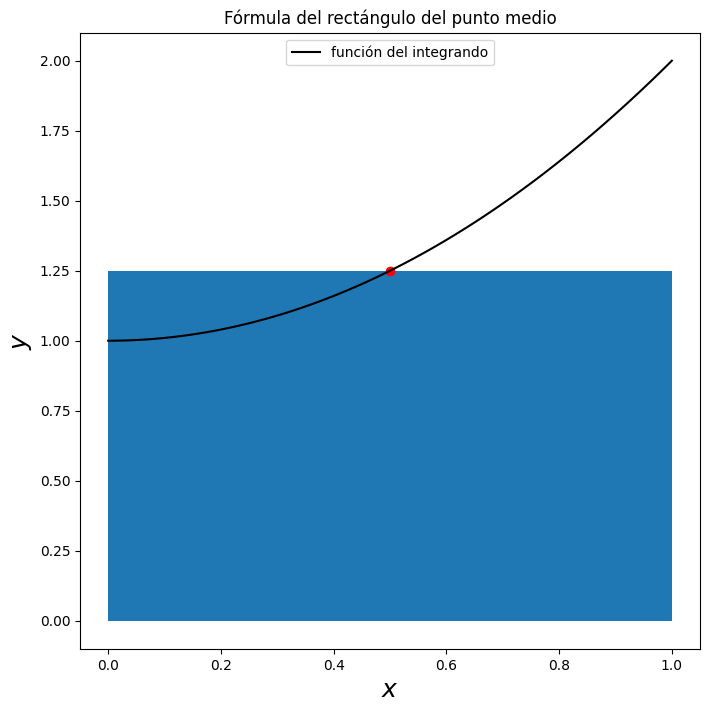

In [45]:
num_values = 100; a = 0; b = 1  # N√∫mero de puntos y l√≠mites del intervalo de integraci√≥n
x_values = np.linspace(float(a), float(b), num_values)  # Genera valores de x uniformemente distribuidos en [a, b]
y_values = f(x_values)  # Calcula los valores de la funci√≥n en los puntos x
x0 = (a + b) / 2  # Calcula el punto medio del intervalo
y0 = f(x0)  # Eval√∫a la funci√≥n en el punto medio

# Configuraci√≥n de la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 8))  
ax.plot(x0, y0, 'ro',)  # Dibuja el punto medio en rojo
ax.plot(x_values, y_values, 'k', label='funci√≥n del integrando')  # Dibuja la funci√≥n en negro

# A√±ade un rect√°ngulo que representa la aproximaci√≥n de la integral
ax.add_patch(
    patches.Rectangle(
        (a, 0),   # (x, y) coordenadas de la esquina inferior izquierda del rect√°ngulo
        b - a,    # Anchura del rect√°ngulo (longitud del intervalo)
        y0,       # Altura del rect√°ngulo (valor de la funci√≥n en el punto medio)
    )
)

# Configuraci√≥n de etiquetas, leyenda y t√≠tulo
ax.legend(loc=9)  # A√±ade la leyenda en la parte superior central
ax.set_xlabel('$x$', fontsize=18)  # Etiqueta del eje x
ax.set_ylabel('$y$', fontsize=18)  # Etiqueta del eje y
ax.set_title('F√≥rmula del rect√°ngulo del punto medio')  # T√≠tulo del gr√°fico

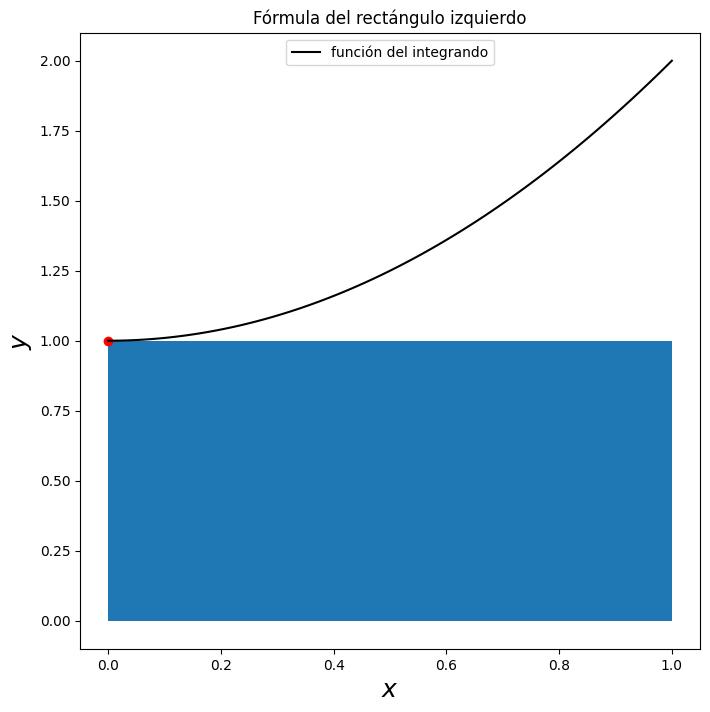

In [46]:
num_values = 100; a = 0; b = 1
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x0 = a; y0 = f(x0)
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x0,y0,'ro')
ax.plot(x_values,y_values,'k',label='funci√≥n del integrando')
ax.add_patch(
    patches.Rectangle(
        (a, 0),   # (x,y) coordenadas esquina inferior izquierda
        b-a,      # anchura, y
        y0,       # altura del rect√°ngulo
    )
)
ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('F√≥rmula del rect√°ngulo izquierdo');

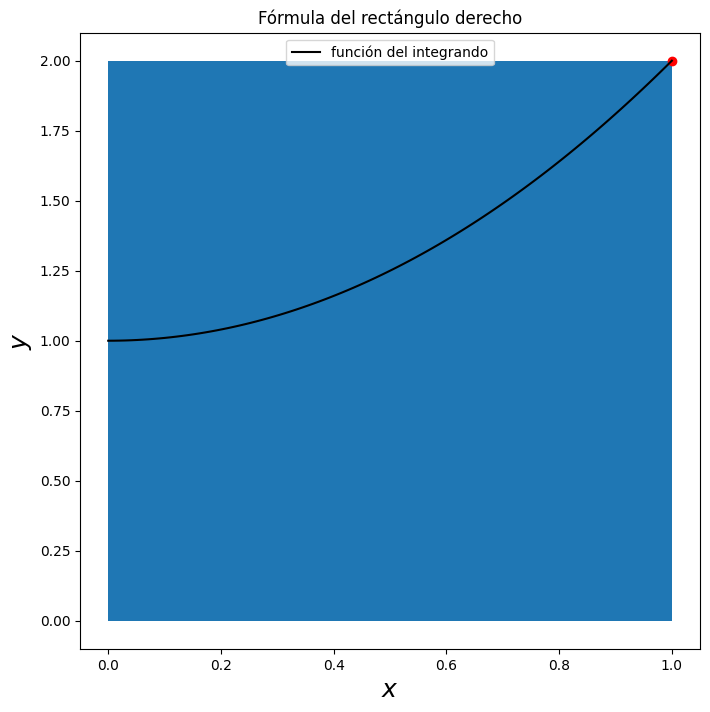

In [47]:
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x0 = b; y0 = f(x0)
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x0,y0,'ro')
ax.plot(x_values,y_values,'k',label='funci√≥n del integrando')
ax.add_patch(
    patches.Rectangle(
        (a, 0),   # (x,y) coordenadas esquina inferior izquierda
        b-a,      # anchura, y
        y0,       # altura del rect√°ngulo
    )
)
ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('F√≥rmula del rect√°ngulo derecho');

La idea ahora para obtener las correspondientes f√≥rmulas compuestas, asociadas a estas reglas de cuadratura simples, ser√≠a aplicarlas a los subintervalos que obtendr√≠amos al subdividir el intervalo original $[a,b]$ mediante una partici√≥n cualquiera del mismo:
$$a=x_0<x_1 < \ldots x_{i-1}<x_i<x_{i+1}<\ldots <x_{n-1}<x_n=b$$
aunque se suele emplear *particiones uniformes* (con $x_{i}-x_{i-1}=h\equiv \frac{b-a}{n},\; \forall i=1,\ldots,n$ para cierto valor entero natural $n\in \mathbb{N}$).

As√≠ pues, para estas f√≥rmulas de los rect√°ngulos obtendr√≠amos las siguientes expresiones en cada uno de los casos:

$$\int_a^b f(x)\,dx = \sum_{i=0}^{n-1}\int_{x_{i}}^{x_{i+1}} f(x)\,dx\approx  \sum_{i=0}^{n-1} (x_{i+1}- x_{i}) f(\psi_i)$$

donde $\psi_i = x_{i}, x_{i+1}$ o bien $\frac{x_{i}+ x_{i+1}}{2}$ seg√∫n se trate de la f√≥rmula de los rect√°ngulos a izquierda, derecha o del punto medio.

Si se tratara de particiones uniformes podremos escribir

$$\int_a^b f(x)\,dx \approx h \sum_{i=0}^{n-1} f(\psi_i)$$
con $\psi_i = a+ i h, a+(i+1) h$ o bien $a+ (i+1/2)h$ seg√∫n el caso, y as√≠ podr√≠amos programarlo tambi√©n sin mucha dificultad.

### 2.2.2. F√≥rmulas compuestas de los rect√°ngulos üî≤üî≤üî≤

A continuaci√≥n mostramos una implementaci√≥n de la f√≥rmula compuesta de los rect√°ngulos a la izquierda.

In [48]:
def formula_rectangulo_izquierda(f,a,b,n):
    """f√≥rmula compuesta de los rectangulos a izquierda"""
    h = (b-a)/n
    nodos = np.linspace(a, b, n+1)  # Genera los nodos de integraci√≥n
    return h*np.sum(f(nodos[:-1]))

Con un valor de `n` razonablemente grande, debe aproximarse al valor real.

In [49]:
valor_aproximado = formula_rectangulo_izquierda(f,a,b,1000)
valor_aproximado

np.float64(1.3328335000000002)

In [50]:
abs(valor_exacto - valor_aproximado)

0.000499833333333033

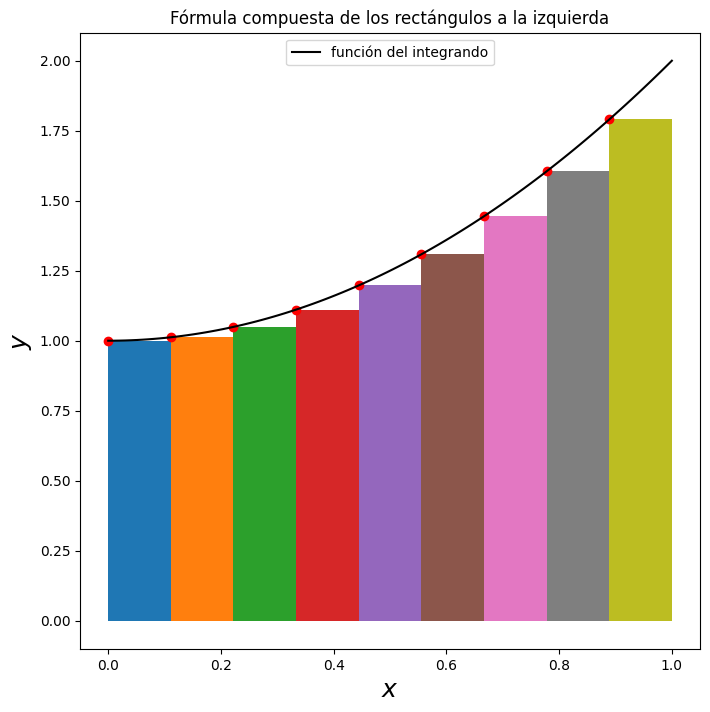

In [51]:
num_values = 100; num_nodos=10
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x_nodos = np.linspace(a,b,num_nodos)
y_nodos = f(x_nodos)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x_nodos[:-1],y_nodos[:-1],'ro')
ax.plot(x_values,y_values,'k',label='funci√≥n del integrando')
for k in range(1,num_nodos):
    zz = np.linspace(float(x_nodos[k-1]),float(x_nodos[k]),num_values)
    yk = [linea(z, x_nodos[k-1], y_nodos[k-1], x_nodos[k], y_nodos[k-1]) for z in zz]
    ax.fill_between(zz,0,yk)


ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('F√≥rmula compuesta de los rect√°ngulos a la izquierda');

> **Ejercicio 6:** Siguiendo el modelo y el c√≥digo proporcionado para la f√≥rmula de los rect√°ngulos a la izquierda, codifique las f√≥rmulas compuestas de los rect√°ngulos a la derecha y centrados. Calcule con estas dos f√≥rmulas la aproximaci√≥n de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido y represente al menos una de las dos gr√°ficamente.

### 2.2.3. F√≥rmulas de los trapecios (simple y compuesta) üé™

Si ahora empleamos trapecios, en vez de rect√°ngulos, para aproximar las integrales de la funci√≥n integrando en cada uno de los subintervalos $[x_{i},x_{i+1}],\; i=0,1,\ldots,n-1$, sabiendo por otra parte que el √°rea de un trapecio de base $[x_{i},x_{i+1}]$ y alturas $f(x_{i})$ y $f(x_{i+1})$ es $(x_{i+1}-x_i)\frac{f(x_{i})+f(x_{i+1})}{2}$, entonces llegar√≠amos a las siguientes f√≥rmulas de los trapecios:

- simple (con $n=1$ y $x_0=a, \; x_1=b$):
$$\int_a^b f(x)\,dx\approx (b-a)\frac{f(a)+f(b)}{2}$$
- compuesta (para cierto $n\in \mathbb{N}$, con $n>1$, y particiones arbitrarias):
$$\int_a^b f(x)\,dx = \sum_{i=0}^{n-1}\int_{x_{i}}^{x_{i+1}} f(x)\,dx\approx  \sum_{i=0}^{n-1} (x_{i+1}- x_{i})\, \frac{f(x_{i})+f(x_{i+1})}{2}$$
- compuesta (para cierto $n\in \mathbb{N}$, con $n>1$, y particiones uniformes):
$$\int_a^b f(x)\,dx = \sum_{i=0}^{n-1}\int_{a+i\,h}^{a+(i+1)\,h} f(x)\,dx\\
\approx  h\; \sum_{i=0}^{n-1} \frac{f(a+i\,h)+f(a+(i+1)\,h)}{2} \\
= \frac{h}{2}\left( f(a)+2\sum_{i=1}^{n-1}f(a+i\,h)+f(b)\right)$$

N√≥tese que por otro lado, la f√≥rmula de los trapecios simple se obtiene sin m√°s que integrar en el intervalo $[a,b]$ la funci√≥n lineal que pasa por los puntos $(a,f(a))$ y $(b,f(b))$ de manera que  $$\int_a^b \left( \frac{f(b)-f(a)}{b-a}(x-a)+f(a) \right)\,dx
= \left[ \frac{f(b)-f(a)}{b-a}\frac{(x-a)^2}{2}+f(a)(x-a) \right]_{x=a}^{x=b} = \\ \frac{f(b)-f(a)}{b-a}\frac{(b-a)^2}{2}+f(a)(b-a)=\frac{b-a}{2}(f(b)-f(a)+2f(a))= \frac{b-a}{2}(f(a)+f(b))$$.

En la siguiente celda mostramos el c√≥digo de la f√≥rmula de los trapecios compuesta.

In [52]:
def formula_trapecios(f,a,b,num_nodos):
    """f√≥rmula compuesta de los trapecios con partici√≥n uniforme"""
    h = (b-a)/num_nodos
    nodos = np.linspace(a, b, num_nodos+1)  # Genera los nodos de integraci√≥n (incluyendo los extremos)
    # Otra opci√≥n ser√≠a
    # nodos = np.array([a + i*h for i in range(num_nodos+1)])

    return h/2*(f(a)+2*np.sum(f(nodos[1:-1]))+f(b))
    # Otra posible implementaci√≥n ser√≠a
    # return h/2*(f(a)+2*sum([f(a+i*h) for i in range(1,num_nodos)])+f(b))

In [53]:
valor_aproximado = formula_trapecios(f,a,b,1000) # valor aproximado de la integral definida
valor_aproximado

np.float64(1.3333335)

Calculemos el error:

In [54]:
abs(valor_aproximado - valor_exacto)

1.66666666689963e-7

Vemos que mejora considerablemente al error cometido por la f√≥rmula de los rect√°ngulos a la izquierda.

A continuaci√≥n, representamos gr√°ficamente la f√≥rmula del trapecio simple:

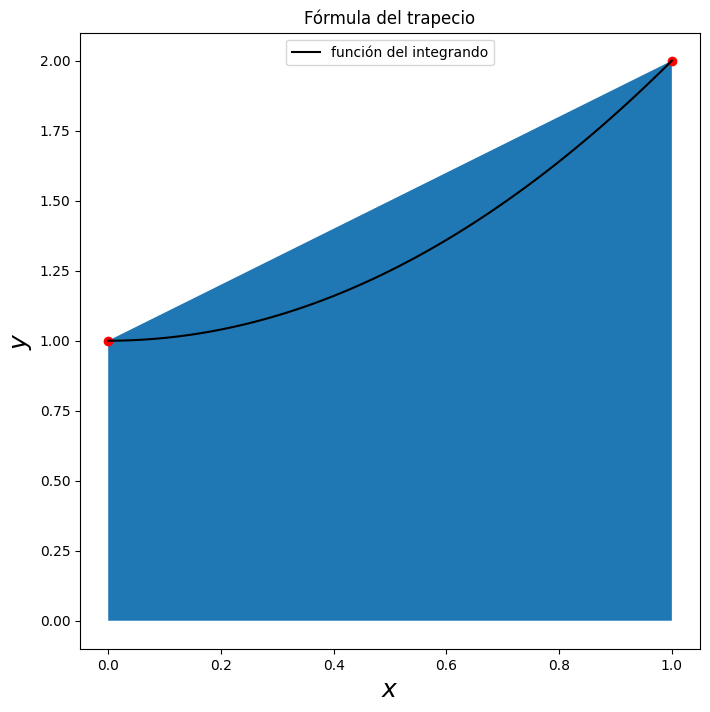

In [55]:
num_values = 100
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x0 = [a,b]; y0 = [f(a),f(b)]
zz = (y0[1]-y0[0])/(b-a)*(x_values-a)+y0[0]
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x0,y0,'ro')
ax.plot(x_values,y_values,'k',label='funci√≥n del integrando')
ax.fill_between(x_values,0,zz)
ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('F√≥rmula del trapecio');

Y la f√≥rmula compuesta:

Text(0.5, 1.0, 'F√≥rmula del trapecio compuesta')

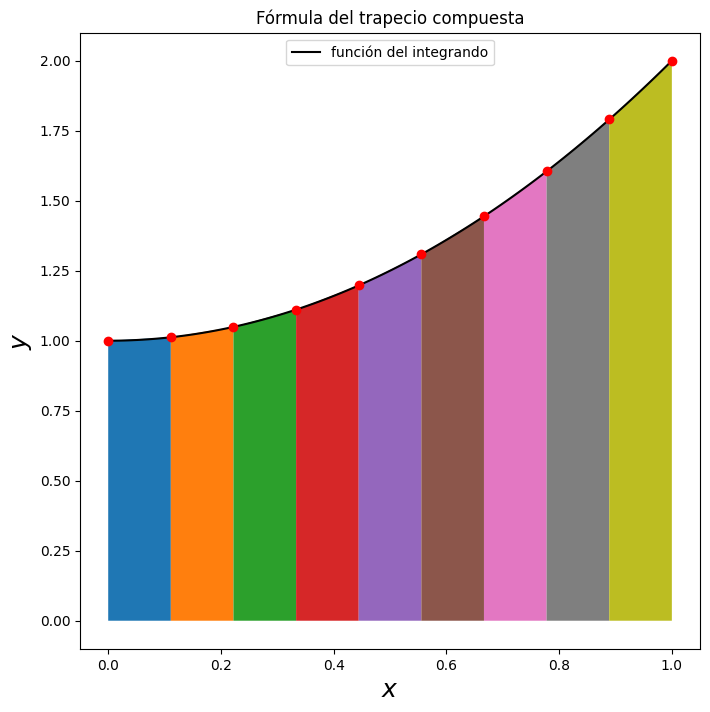

In [56]:
num_values = 100
num_nodos=10
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x_nodos = np.linspace(a,b,num_nodos)
y_nodos = f(x_nodos)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x_values,y_values,'k',label='funci√≥n del integrando')
for k in range(1,num_nodos):
    zz = np.linspace(float(x_nodos[k-1]),float(x_nodos[k]),num_values)
    yk = [linea(z,x_nodos[k-1],y_nodos[k-1],x_nodos[k],y_nodos[k]) for z in zz]
    ax.fill_between(zz,0,yk)
ax.plot(x_nodos,y_nodos,'ro')


ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('F√≥rmula del trapecio compuesta')

### 2.2.4. F√≥rmulas de Simpson (simple y compuesta) üíõ

Ya hemos visto que las *f√≥rmulas simples* de integraci√≥n num√©rica  se pueden obtener sin m√°s que sustituir la funci√≥n del integrando por un polinomio de interpolaci√≥n de grado cero (en el caso de las f√≥rmulas de los rect√°ngulos) o bien por un polinomio de grado uno que iterpola los valores de la funci√≥n en ambos extremos del intervalo.

Por otro lado, para obtener las correspondientes *f√≥rmulas compuestas*, bastar√≠a con sustituir la funci√≥n en el intervalo total $[a,b]$ por funciones polin√≥micas a trozos: ya sea de grado cero discontinuas, (en el caso de las f√≥rmulas de los rect√°ngulos) o bien lineales continuas (en el caso de la f√≥rmula de los trapecios compuesta).

En el caso de la f√≥rmula de Simpson que nos ocupa ahora, este procedimiento se lleva un paso m√°s all√°, considerando ahora polinomios de grado $2$ (es decir, una par√°bola en el caso de la *f√≥rmula de Simpson* simple o bien trozos de par√°bolas consecutivos, en el caso de la f√≥rmula de Simpson compuesta).

In [93]:
xL,yL,xM,yM,xR,yR = sp.symbols('x_L,y_L,x_M,y_M,x_R,y_R')
a, b = sp.symbols('a,b')
dyL,dyR = sp.symbols('dyL,dyR')

parabola_3_puntos = sp.interpolate([(xL,yL),(xM,yM),(xR,yR)],x).factor() # Interpolaci√≥n de Lagrange para 3 puntos
parabola_3_puntos

-(x**2*x_L*y_M - x**2*x_L*y_R - x**2*x_M*y_L + x**2*x_M*y_R + x**2*x_R*y_L - x**2*x_R*y_M - x*x_L**2*y_M + x*x_L**2*y_R + x*x_M**2*y_L - x*x_M**2*y_R - x*x_R**2*y_L + x*x_R**2*y_M - x_L**2*x_M*y_R + x_L**2*x_R*y_M + x_L*x_M**2*y_R - x_L*x_R**2*y_M - x_M**2*x_R*y_L + x_M*x_R**2*y_L)/((x_L - x_M)*(x_L - x_R)*(x_M - x_R))

In [94]:
# Comprobamos que el polinomio interpolador pasa por los puntos (xL,yL), (xM,yM) y (xR,yR)
parabola_3_puntos.subs({x:xL}).simplify(), \
parabola_3_puntos.subs({x:xM}).simplify(), \
parabola_3_puntos.subs({x:xR}).simplify()

(y_L, y_M, y_R)

Si ahora integramos la par√°bola que pasa por los puntos determinados por los valores de cierta funci√≥n en los extremos del intervalo $[x_L,x_R]$: $(x_L,y_L)$ y $(x_R,y_R)$, as√≠ como por el correspondiente valor $y_M$ en el punto medio del intervalo $\frac{x_L+x_R}{2}$, obtendremos la f√≥rmula de Simpson simple.

In [95]:
parabola_simpson = sp.interpolate([(xL,yL),((xL+xR)/2,yM),(xR,yR)],x)
sp.integrate(parabola_simpson,[x,xL,xR]).factor()

-(x_L - x_R)*(y_L + 4*y_M + y_R)/6

Un m√©todo alternativo, pero equivalente, consistir√≠a en imponer exactitud al menos para los monomios generadores de la base can√≥nica de  $\mathbb{P}_2\equiv L(\{1,x,x^2\})$, los polinomios de grado menor o igual que $2$.  Ve√°mos c√≥mo ser√≠a el proceso para esta f√≥rmula de Simpson.

In [60]:
AB = sp.Matrix([ [a**k,((a+b)/2)**k,b**k, sp.integrate(x**k,[x,a,b])] for k in range(3)])
AB

Matrix([
[   1,              1,    1,           -a + b],
[   a,      a/2 + b/2,    b, -a**2/2 + b**2/2],
[a**2, (a/2 + b/2)**2, b**2, -a**3/3 + b**3/3]])

In [61]:
?sp.linsolve

Signature: sp.linsolve(system, *symbols)
Docstring:
Solve system of $N$ linear equations with $M$ variables; both
underdetermined and overdetermined systems are supported.
The possible number of solutions is zero, one or infinite.
Zero solutions throws a ValueError, whereas infinite
solutions are represented parametrically in terms of the given
symbols. For unique solution a :class:`~.FiniteSet` of ordered tuples
is returned.

All standard input formats are supported:
For the given set of equations, the respective input types
are given below:

.. math:: 3x + 2y -   z = 1
.. math:: 2x - 2y + 4z = -2
.. math:: 2x -   y + 2z = 0

* Augmented matrix form, ``system`` given below:

$$ \text{system} = \left[{array}{cccc}
    3 &  2 & -1 &  1\\
    2 & -2 &  4 & -2\\
    2 & -1 &  2 &  0
    \end{array}\right] $$

::

    system = Matrix([[3, 2, -1, 1], [2, -2, 4, -2], [2, -1, 2, 0]])

* List of equations form

::

    system  =  [3x + 2y - z - 1, 2x - 2y + 4z + 2, 2x - y + 2z]

* Input $A$ an

In [62]:
c0,c1,c2 = sp.symbols('c0,c1,c2')
sp.linsolve(AB,[c0,c1,c2])

{(-a/6 + b/6, -2*a/3 + 2*b/3, -a/6 + b/6)}

Vemos que hubi√©ramos obtenido exactamente la misma f√≥rmula por este procedimiento

$$ \int_a^b f(x)\,dx \approx \frac{b-a}{6} \left( f(a)+ 4f\left(\frac{a+b}{2}\right) +f(b) \right)$$

> **Ejercicio 7:** Implemente una funci√≥n que calcule la integral de una funci√≥n $f$ en el intervalo $[a,b]$ usando la f√≥rmula de Simpson compuesta, parametrizando tambi√©n el n√∫mero de subintervalos utilizados (se premia la eficiencia). Represente gr√°ficamente la f√≥rmula de Simpson compuesta an√°logamente a la representaci√≥n mostrada para la f√≥rmula de los trapecios compuesta.

>**Ejercicio 8:** Realice una comparativa entre los errores cometidos al aproximar funciones potencias sucesivas $x^i$, con $i=1,2,3,\ldots$ en el intervalo $[0,1]$ mediante las f√≥rmulas de los trapecios y de Simpson compuestas con diferentes valores de $h$; e inducir de ah√≠, los posibles √≥rdenes de exactitud (a partir de los valores de $i$ que proporcionen valores exactos de la integral). No deje de tener en cuenta los posibles errores de redondeo, inevitables en todo c√°lculo realizado con ordenador.

### 2.2.5. Integraci√≥n Romberg ‚ÜòÔ∏è

La integraci√≥n Romberg es una t√©cnica que combina la f√≥rmula compuesta de los trapecios, que denotamos como

$$
    T_n = \frac h 2 \left( f(a) + 2\sum_{i=1}^{n-1} f(a+ih) + f(b) \right),
$$
donde $h=(b-a)/n$, con diferentes valores de $n$ para aumentar el orden del t√©rmino de error.

La idea es construir la tabla


|          |          |          |          |          |          |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| $R(0,0)$ |          |          |          |          |          |
| $R(1,0)$ | $R(1,1)$ |          |          |          |          |
| $\vdots$ | $\vdots$ | $\ddots$ |          |          |          |
| $R(j,0)$ | $R(j,1)$ | $\ddots$ | $R(j,j)$ |          |          |
| $\vdots$ | $\vdots$ | $\ddots$ | $\vdots$ | $\ddots$ |          |
| $R(N,0)$ | $R(N,1)$ | $\cdots$ | $R(N,j)$ | $\cdots$ | $R(N,N)$ |



donde

$$
R(j,0) = T_{2^j}, \qquad R(j,k) = \dfrac{4^k R(j,k-1)-R(j-1,k-1)}{4^k-1}, j=0,\dots,N,\ \ k = 1,\dots,j.
$$
y aproximar el valor de la integral mediante la sucesi√≥n $\{R(N,N)\}$, estableciendo un criterio de parada basado en que la diferencia absoluta de dos terminos consecutivos sea menor que una tolerancia prefijada.


### 2.2.6. Integraci√≥n adaptativa üõèÔ∏è

Hasta el momento, todas las f√≥rmulas compuestas han utilizado nodos equiespaciados, que tienen la facilidad de que son muy sencillos de calcular, pero podr√≠an suponer un problema en funciones con regiones cambiantes. La integraci√≥n adaptativa, como su propio nombre indica, adapta el tama√±o de los intervalos de acuerdo a las variaciones de la funci√≥n. Para ello, dado un intervalo de integraci√≥n $[a,b]$, consideramos la semiamplitud del intervalo $h=(b-a)/2$, el valor medio $m=(a+b)/2$ y denotamos la f√≥rmula de Simpson simple como
$$
S(a,b) = \frac h 3 (f(a)+4 f(m) + f(b)).
$$
Ahora, como sabemos que
$$
\int_a^b f(x) dx = \int_a^m f(x) dx + \int_m^b f(x) dx,
$$
aproximamos cada una de las integrales mediante la regla de Simpson y fijamos una tolerancia $\varepsilon$, de forma que, si
$$
|S(a,b) - S(a,m) - S(m,b)| < \varepsilon,
$$
entonces aceptamos la aproximaci√≥n $S(a,b) \approx \int_a^b f(x) dx $. En caso de que esto no se cumpla, repetimos el algoritmo por separado en cada uno de los subintervalos $[a,m]$ y $[m,b]$ con tolerancia $\varepsilon/2$.

>**Ejercicio 9:** Programar las t√©cnicas de integraci√≥n de Romberg y adaptativa, para despu√©s aplicarlas a la aproximaci√≥n de la siguiente integral $$\int_a^b p(x)\, dx$$
>siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y
>$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
>(siendo $d_0, d_1, \ldots, d_7$ los d√≠gitos de su DNI, pasaporte o tarjeta de residente).

### 2.2.7 F√≥rmulas gaussianas

Las f√≥rmulas gaussianas usan como nodos aquellos que conducen a una precisi√≥n m√°xima. Si vamos a construir una f√≥rmula de integraci√≥n num√©rica con $n$ nodos, sabemos que podemos elegirlos de manera √∫nica, de forma que la f√≥rmula correspondiente alcanza precisi√≥n $2n-1$. Por tanto, para construir f√≥rmulas gaussianas, hemos de calcular los nodos y los coeficientes. Para ello, primero calcularemos los nodos y despu√©s resolveremos el sistema de ecuaciones lineales que nos dar√° el valor de los coeficientes.

Lo haremos a continuaci√≥n, puesto que *Python* (o cualquier otro sistema que permita realizar c√°lculos simb√≥licos, o bien num√©ricos) lo resuelve sin dificultad para valores de $n$ bajos. Tambi√©n sabemos que los nodos de una f√≥rmula gaussiana son los ceros de cierto polinomio ortogonal. Para los productos escalares m√°s usuales, los *polinomios ortogonales* correspondientes est√°n contenidos en ciertos m√≥dulos concretos de *Python*; por tanto, podemos calcular sus ra√≠ces para obtener dichos nodos. Lo haremos para los polinomios de Chebyshev. En un caso especial es posible encontrar el polinomio ortogonal correspondiente y calcular sus ra√≠ces con la orden correspondiente.

#### La f√≥rmula gaussiana con dos nodos y peso $w=1$

Siguiendo el Ejemplo 1 de las diapositivas de teor√≠a, vamos a calcular la f√≥rmula gaussiana con dos nodos $x_0$ y $x_1$.
$$
\int_{-1}^1 f(x) dx = c_0 f(x_0) + c_1 f(x_1) + R(f)
$$

In [63]:
f = sp.Function('f')
x = sp.Symbol('x')
x0, x1 = sp.symbols('x_0,x_1')
c0, c1 = sp.symbols('c_0,c_1')

a, b = -1, 1
n = 2

Primero calculamos los nodos imponiendo que el polinomio $\Pi(x)=(x-x_0)(x-x_1)$ verifique
$$
\int_{-1}^1 \Pi(x)dx = 0, \qquad \int_{-1}^1 x\Pi(x)dx = 0. 
$$

In [64]:
pol = (x-x0)*(x-x1)

ecs = [sp.integrate(pol,[x,a,b]),
       sp.integrate(pol*x,[x,a,b])]

x0, x1 = sp.solve(ecs,[x0,x1])[0]
x0,x1

(-sqrt(3)/3, sqrt(3)/3)

Una vez calculados los nodos, calculamos los coeficientes imponiendo exactitud en $\{1,x\}$, esto es:
$$
c_0\cdot 1 + c_1\cdot 1 = \int_{-1}^1 1 \cdot dx , \qquad c_0 x_0 + c_1 x_1 = \int_{-1}^1 x dx.
$$

In [65]:
ecs = [ sp.Eq(c0    + c1,    sp.integrate(1,(x,-1,1))),
        sp.Eq(c0*x0 + c1*x1, sp.integrate(x,(x,-1,1)))]

In [66]:
ecs[0]

Eq(c_0 + c_1, 2)

In [67]:
ecs[1]

Eq(-sqrt(3)*c_0/3 + sqrt(3)*c_1/3, 0)

In [68]:
sols = sp.solve(ecs,[c0,c1])
c0, c1 = sols[c0], sols[c1],
c0, c1

(1, 1)

Finalmente, la f√≥rmula gaussiana (f√≥rmula de Gauss-Legendre) es:

In [69]:
c0*f(x0) + c1*f(x1)

f(-sqrt(3)/3) + f(sqrt(3)/3)

Vemos pues que con la ayuda del comando `solve` del m√≥dulo de c√°lculo simb√≥lico `SymPy` hemos podido obtener sin demasiado problema tanto los coeficientes de la f√≥rmula Gaussiana como los nodos que hace falta considerar para obtener la m√°xima exactitud en el intervalo considerado ($[-1,1]$ en este caso). Tambi√©n vemos que
uno de los posibles inconvenientes para la obtenci√≥n de estas f√≥rmulas gaussianas es que debemos resolver sistemas de ecuaciones no lineales, no siempre f√°ciles de resolver, aparte de que los nodos suelen ser n√∫meros trascencentes, y si no trabaj√°ramos en simb√≥lico, ya su mera aproximaci√≥n introducir√≠a un primer error.

#### F√≥rmulas de Gauss-Chebyshev

En este caso vamos a deducir una f√≥rmula gaussiana para un peso que no es id√©nticamente nulo. En particular, en el intervalo $[-1,1]$, consideramos el peso $w(x)=\dfrac 1 {\sqrt{1-x^2}}$. De acuerdo con el m√©todo, buscamos un polinomio $\Pi(x)$ que verifique
$$
L(x^j \Pi(x)) = \int_{-1}^1 \dfrac{x^j\Pi(x)}{\sqrt{1-x^2}}dx = 0,\qquad j=0,\dots,n.
$$

Los polinomios que verifican esta propiedad son conocidos como polinomios de Chebyshev, a menudo denotados como $T_k$. En `sympy`, podemos encontrarlos utilizando la funci√≥n `chebyshevt`. Sin embargo, a nosotros nos interesan las ra√≠ces de estos polinomios, que afortunadamente tambi√©n son conocidas y se pueden obtener mediante la funci√≥n `chebyshevt_root`.


In [70]:
from sympy import chebyshevt, chebyshevt_root

print("Polinomios de Chebyshev de diferentes grados:")
for j in range(10):
    print(f"Grado {j}: {chebyshevt(j,x)}")

Polinomios de Chebyshev de diferentes grados:
Grado 0: 1
Grado 1: x
Grado 2: 2*x**2 - 1
Grado 3: 4*x**3 - 3*x
Grado 4: 8*x**4 - 8*x**2 + 1
Grado 5: 16*x**5 - 20*x**3 + 5*x
Grado 6: 32*x**6 - 48*x**4 + 18*x**2 - 1
Grado 7: 64*x**7 - 112*x**5 + 56*x**3 - 7*x
Grado 8: 128*x**8 - 256*x**6 + 160*x**4 - 32*x**2 + 1
Grado 9: 256*x**9 - 576*x**7 + 432*x**5 - 120*x**3 + 9*x


La funci√≥n `chebyshevt_root(n,k)` devuelve la `k`-√©sima ra√≠z del polinomio de Chebyshev de grado `n`.

In [97]:
n = 3
chebyshevt_root(n,2)

-sqrt(3)/2

Calculamos por tanto todos los nodos $x_0,\dots,x_{n-1}$

In [72]:
nodos = [chebyshevt_root(n,k) for k in range(n)]
nodos

[sqrt(3)/2, 0, -sqrt(3)/2]

Por √∫ltimo, para obtener los pesos, imponemos exactitud en $1,x,\dots,x^{n-1}$. Esto es, resolver el sistema
$$
\sum_{k=0}^{n-1} c_k x_k^j =  \int_{-1}^1 \dfrac{x^j}{\sqrt{1-x^2}}dx, \qquad j=0,\dots,n-1.
$$

Tenemos entonces la lista de coeficientes (inc√≥gnitas)

In [73]:
c = sp.symbols('c0:'+ str(n)) # generamos una tupla de n coeficientes
coefs = list(c)
coefs

[c0, c1, c2]

Creamos las ecuaciones

In [74]:
ecs = [ sp.Eq(sum([ci*(xi**j) for ci,xi in zip(coefs, nodos)]), sp.integrate(x**j/sp.sqrt(1-x**2), (x,-1,1)) ) for j in range(n) ]
ecs

[Eq(c0 + c1 + c2, pi),
 Eq(sqrt(3)*c0/2 - sqrt(3)*c2/2, 0),
 Eq(3*c0/4 + 3*c2/4, pi/2)]

Y encontramos las soluciones

In [75]:
sols = sp.solve(ecs,coefs)
sols

{c0: pi/3, c1: pi/3, c2: pi/3}

Finalmente la f√≥rmula de Gauss-Chebyshev calculada es:

In [76]:
sum([ci*f(xi) for ci,xi in zip(sols.values(), nodos)]).factor()

pi*(f(0) + f(-sqrt(3)/2) + f(sqrt(3)/2))/3

### 2.2.8. Otras posibilidades para la integraci√≥n num√©rica usando algunos m√≥dulos de Python üêç

*Python* tiene tambi√©n  varias √≥rdenes para la integraci√≥n de funciones, ya sea de manera simb√≥lica o num√©rica. Cada una de ellas vendr√° implementada en cierto m√≥dulo concreto de Python, por lo que ser√° conveniente saber d√≥nde y c√≥mo deberemos cargar y usar dichas √≥rdenes.

Por ejemplo, para la integraci√≥n simb√≥lica usaremos evidentemente la orden correspondiente incorporada en el m√≥dulo `SymPy`. Esta √≥rden es `integrate`, que ya la hemos utilizado anteriormente. A continuaci√≥n vemos algunos otros ejemplos de uso, tanto para obtener integrales indefinidas (primitivas) como integrales definidas, de forma exacta siempre que sea posible. N√≥tese que esta orden requiere que la funci√≥n tenga una primitiva, a la que aplica la regla de Barrow en el caso de tratarse de una integral definida.

In [77]:
x = sp.Symbol('x')

In [78]:
# Integral indefinida
sp.integrate(x,x)

x**2/2

In [79]:
# Integral definida
sp.integrate(x,[x,0,1])

1/2

In [80]:
sp.integrate(x**2,x),sp.integrate(x**2,[x,0,1])

(x**3/3, 1/3)

In [81]:
# N√≥tese aqu√≠ el efecto de indicar alguno de los l√≠mites
# de integraci√≥n con el punto decimal
sp.integrate(x**3-x+2,[x,0,1]),sp.integrate(x**3-x+2,[x,0,1.])

(7/4, 1.75000000000000)

Si intentamos integrar una funci√≥n que no tiene primitiva

In [82]:
sp.integrate(sp.exp(x**2),x)

sqrt(pi)*erfi(x)/2

[¬øQu√© es eso de erfi?](https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.error_functions.erfi)

In [83]:
?sp.erfi

Init signature: sp.erfi(z)
Docstring:     
Imaginary error function.

Explanation

The function erfi is defined as:

.. math ::
    \mathrm{erfi}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{t^2} \mathrm{d}t

Examples

>>> from sympy import I, oo, erfi
>>> from sympy.abc import z

Several special values are known:

>>> erfi(0)
0
>>> erfi(oo)
oo
>>> erfi(-oo)
-oo
>>> erfi(I*oo)
I
>>> erfi(-I*oo)
-I

In general one can pull out factors of -1 and $I$ from the argument:

>>> erfi(-z)
-erfi(z)

>>> from sympy import conjugate
>>> conjugate(erfi(z))
erfi(conjugate(z))

Differentiation with respect to $z$ is supported:

>>> from sympy import diff
>>> diff(erfi(z), z)
2*exp(z**2)/sqrt(pi)

We can numerically evaluate the imaginary error function to arbitrary
precision on the whole complex plane:

>>> erfi(2).evalf(30)
18.5648024145755525987042919132

>>> erfi(-2*I).evalf(30)
-0.995322265018952734162069256367*I

See Also

erf: Gaussian error function.
erfc: Complementary error function.
erf2: Two-argu

In [84]:
sp.integrate(sp.exp(-x**2),[x,-sp.oo,sp.oo])

sqrt(pi)

In [85]:
sp.integrate(sp.cos(x**2),x)

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)*x/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

[¬øDe donde sale esa C?](https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.error_functions.fresnelc)

In [86]:
sp.fresnelc?

Init signature: sp.fresnelc(z)
Docstring:     
Fresnel integral C.

Explanation

This function is defined by

.. math:: \operatorname{C}(z) = \int_0^z \cos{\frac{\pi}{2} t^2} \mathrm{d}t.

It is an entire function.

Examples

>>> from sympy import I, oo, fresnelc
>>> from sympy.abc import z

Several special values are known:

>>> fresnelc(0)
0
>>> fresnelc(oo)
1/2
>>> fresnelc(-oo)
-1/2
>>> fresnelc(I*oo)
I/2
>>> fresnelc(-I*oo)
-I/2

In general one can pull out factors of -1 and $i$ from the argument:

>>> fresnelc(-z)
-fresnelc(z)
>>> fresnelc(I*z)
I*fresnelc(z)

The Fresnel C integral obeys the mirror symmetry
$\overline{C(z)} = C(\bar{z})$:

>>> from sympy import conjugate
>>> conjugate(fresnelc(z))
fresnelc(conjugate(z))

Differentiation with respect to $z$ is supported:

>>> from sympy import diff
>>> diff(fresnelc(z), z)
cos(pi*z**2/2)

Defining the Fresnel functions via an integral:

>>> from sympy import integrate, pi, cos, expand_func
>>> integrate(cos(pi*z**2/2), z)
fresnelc

In [87]:
sp.integrate(sp.cos(x**2),[x,0,1])

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

Por otro lado estar√≠an las √≥rdenes espec√≠ficas para la integraci√≥n num√©rica, entre las que resaltamos la √≥rden [`quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) para la integraci√≥n de funciones de una variable. Existen las correspondientes versiones para funciones de dos y tres variables ([`dblquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad) y [`tplquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html#scipy.integrate.tplquad)) que nos permitir√°n aproximar num√©ricamente integrales dobles y triples, respectivamente. Todas ellas se encuentran implementadas dentro del subm√≥dulo `integrate` del m√≥dulo `SciPy` y tendremos que cargarlas previamente para poder usarlas.

In [88]:
from scipy.integrate import quad, dblquad, tplquad

Empecemos con la orden `quad`, que nos permitir√° aproximar la integral definida de una funci√≥n real de variable real en un intervalo determinado. As√≠ pues, esta orden lleva programada una integraci√≥n num√©rica adaptativa que puede en principio ser aplicada a cualquier funci√≥n definida y acotada en un intervalo $[a,b]$.
Por otro lado, tiene bastantes argumentos opcionales que pueden ser usados para afinar mucho m√°s en el c√°lculo de dicha aproximaci√≥n num√©rica.

In [89]:
?quad

Signature:
quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
    complex_func=False,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCa

In [90]:
def f(x):
    """funci√≥n del integrando: x^2+1"""
    return x**2+1

In [91]:
# No obstante, su uso b√°sico ser√≠a el siguiente:
# f ser√≠a la funci√≥n del integrando,
# que deber√≠a estar definida previamente
# a no ser que usemos una funci√≥n 'lambda'

x_min = 0 # el l√≠mite inferior en la variable de integraci√≥n x
x_max = 1 # el l√≠mite superior en la variable de integraci√≥n x

val, abserr = quad(f, x_min, x_max)

# en las variables val y abserr almacenaremos el valor aproximado
# de la integral, as√≠ como la estimaci√≥n del error cometido en
# valor absoluto

print (f"valor aprox. de la integral = {val},\nerror estimado = {abserr}")

valor aprox. de la integral = 1.3333333333333333,
error estimado = 1.4802973661668752e-14


> **Ejercicio 10:** Calcule la misma integral del ejercicio 9 pero utilizando la orden `quad` y compare los resultados de la integraci√≥n Romberg y adaptativa manuales con los de la orden `quad`.

In [92]:
print("Fin de la pr√°ctica üèÅ")

Fin de la pr√°ctica üèÅ
